# Decision Trees

## Imports

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import _tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import seaborn as sns

## Loading data

In [3]:
data_path = '../preprocessing/preprocessed.csv'
data = pd.read_csv(data_path)

# Seleccionar la columna 'price_category' como variable objetivo
X = data.drop('price_category', axis=1)
y = data['price_category']

# Dividimos el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Basic model

### Creation and training

In [4]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Evaluation

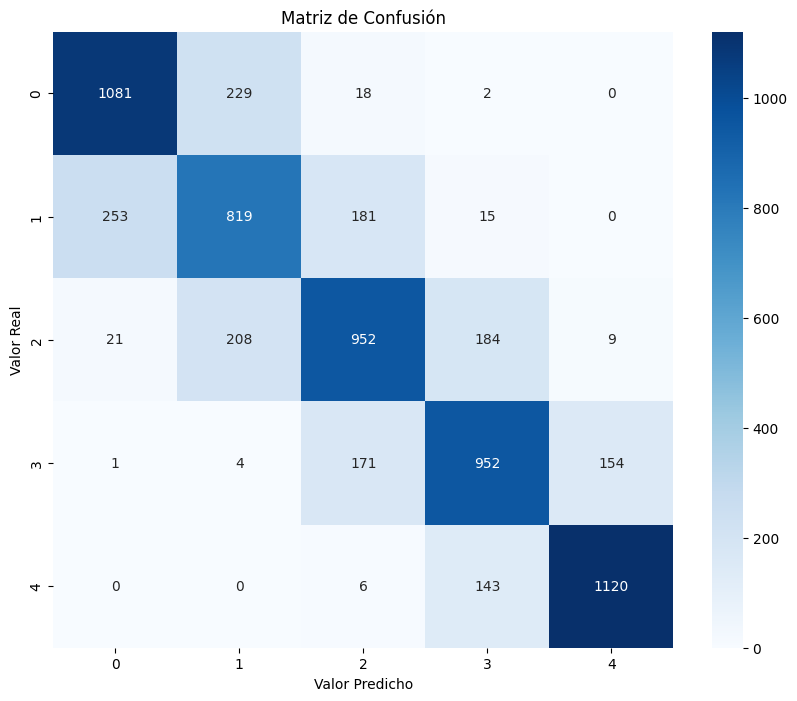

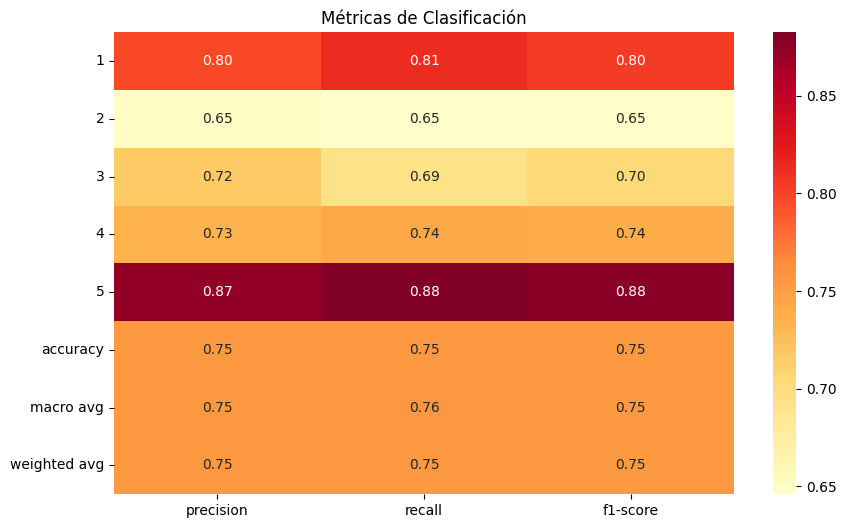

In [5]:
y_pred = clf.predict(X_test)

# 1. Matriz de confusión
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

# 2. Métricas de clasificación
report = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df[['precision', 'recall', 'f1-score']], 
            annot=True, 
            cmap='YlOrRd', 
            fmt='.2f')
plt.title('Métricas de Clasificación')
plt.show()

### Visualitzation

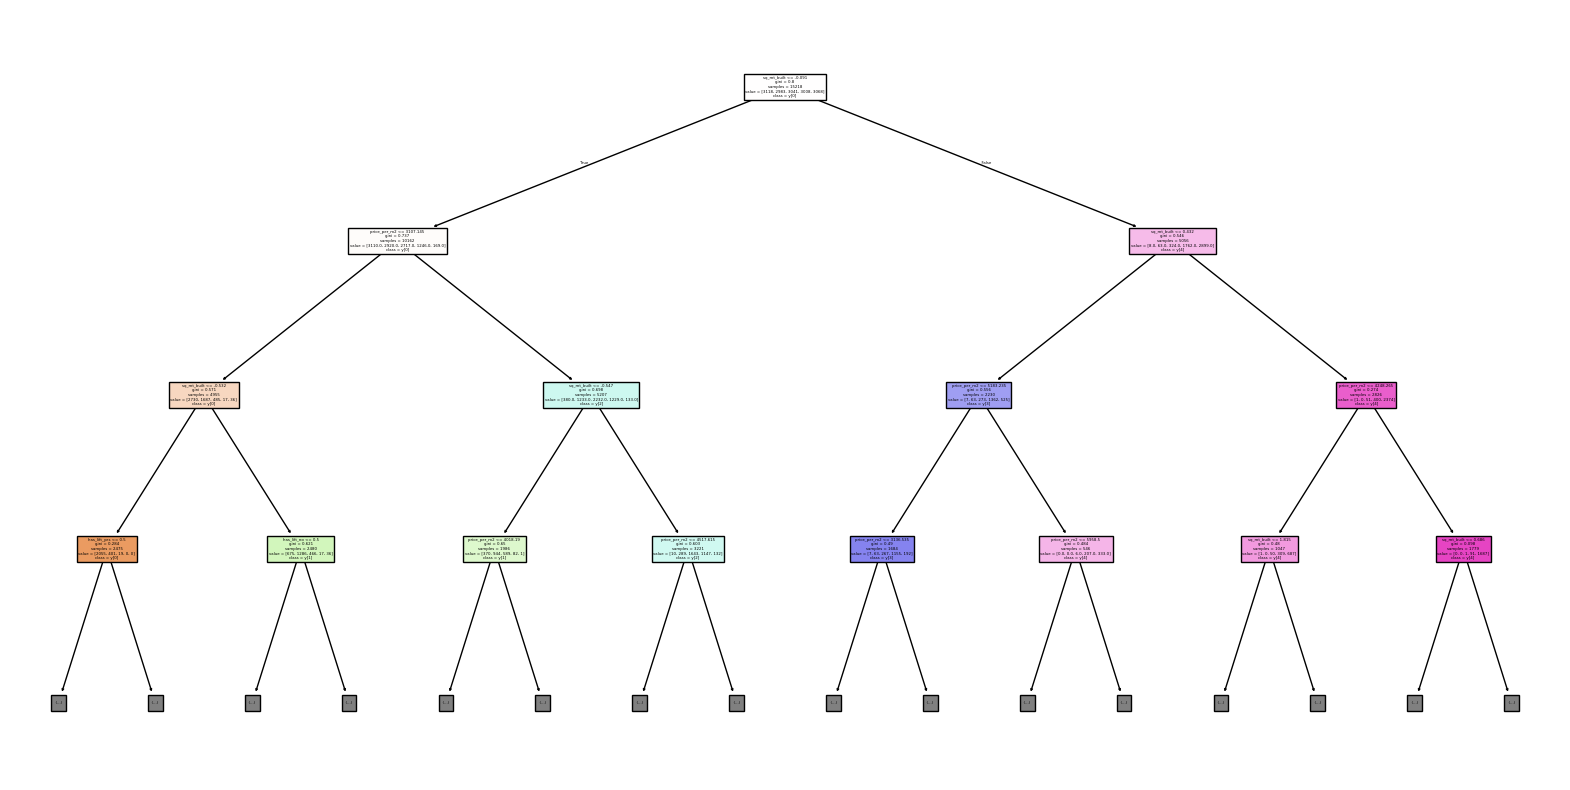

In [6]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=True, max_depth=3)
plt.show()

## Custom model

### Params selection

Los parámetros elegidos son los siguientes:
- criterion: Define la métrica utilizada para medir la calidad de las divisiones. Puede ser el índice de Gini (que mide la impureza) o la entropía (basada en information gain).
- splitter: Determina la estrategia para seleccionar la división en cada nodo. Puede buscar la mejor división posible o seleccionar una aleatoria entre las mejores opciones.
- max_depth: Limita la profundidad máxima del árbol, lo que ayuda a controlar el sobreajuste. Si se deja como `None`, el árbol crecerá hasta que todas las hojas sean puras o contengan menos muestras que el mínimo permitido.
- min_samples_split: Es el número mínimo de muestras necesarias para dividir un nodo. Valores más altos evitan divisiones excesivas y reducen el riesgo de sobreajuste.
- min_samples_leaf: Es el número mínimo de muestras que debe tener una hoja. Esto asegura que las hojas no sean demasiado pequeñas.
- min_impurity_decrease: Es el umbral mínimo de reducción de impureza requerido para realizar una división. Ayuda a evitar divisiones que no aporten suficiente valor.

In [7]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'min_impurity_decrease': [0.0, 0.01, 0.02]
}

### Creation and training

In [8]:
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=10,  # 10-fold cross-validation
    scoring='f1_macro',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
[CV] END criterion=gini, max_depth=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_impurity_decrease=0.0, min_sampl

### Evaluation

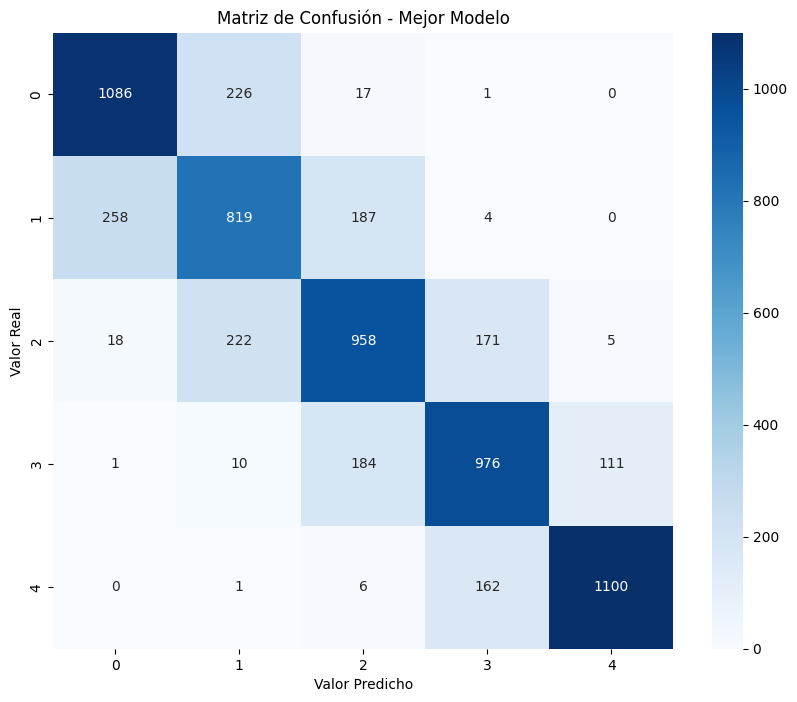

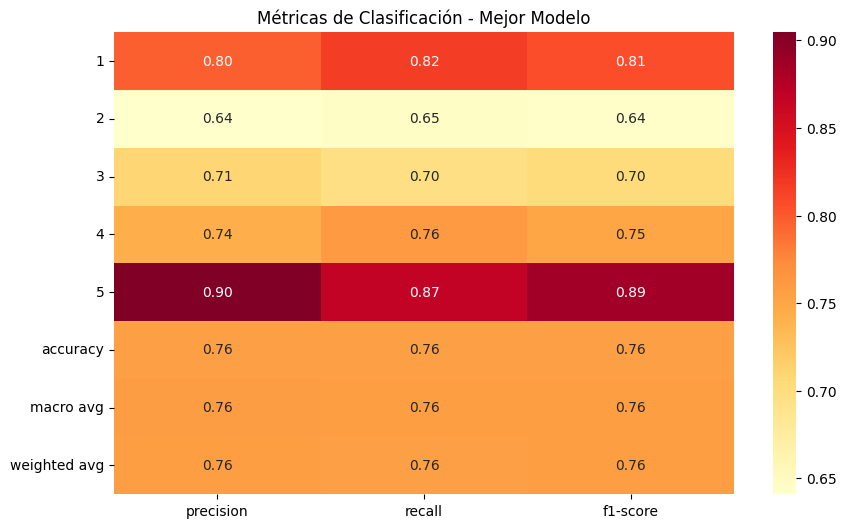

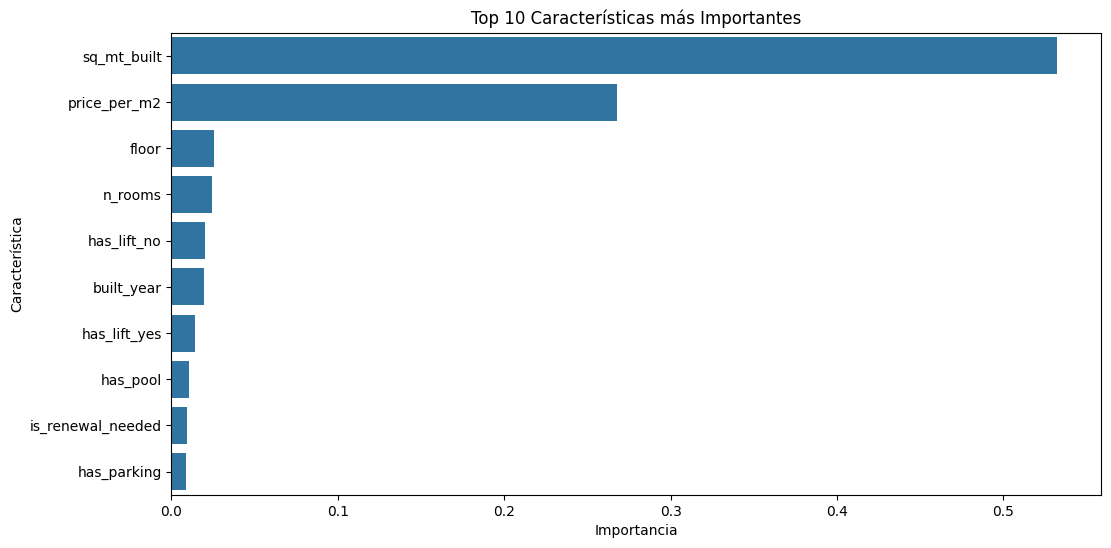

In [9]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# 1. Matriz de confusión
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Mejor Modelo')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

# 2. Métricas de clasificación
report = classification_report(y_test, y_pred_best, output_dict=True)
metrics_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df[['precision', 'recall', 'f1-score']], 
            annot=True, 
            cmap='YlOrRd', 
            fmt='.2f')
plt.title('Métricas de Clasificación - Mejor Modelo')
plt.show()

# 3. Feature Importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title('Top 10 Características más Importantes')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

### Visualitzation

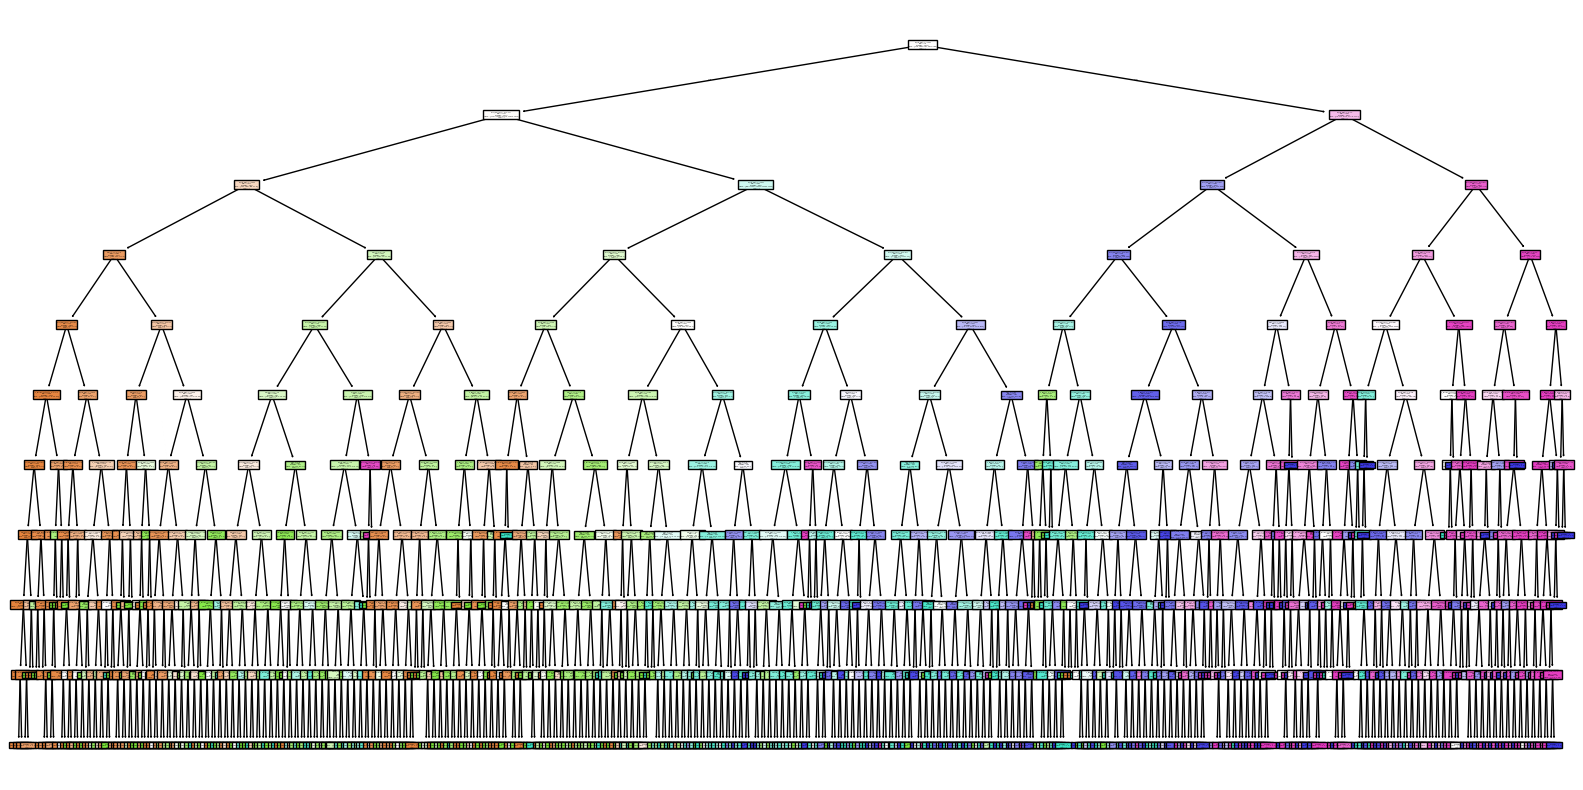

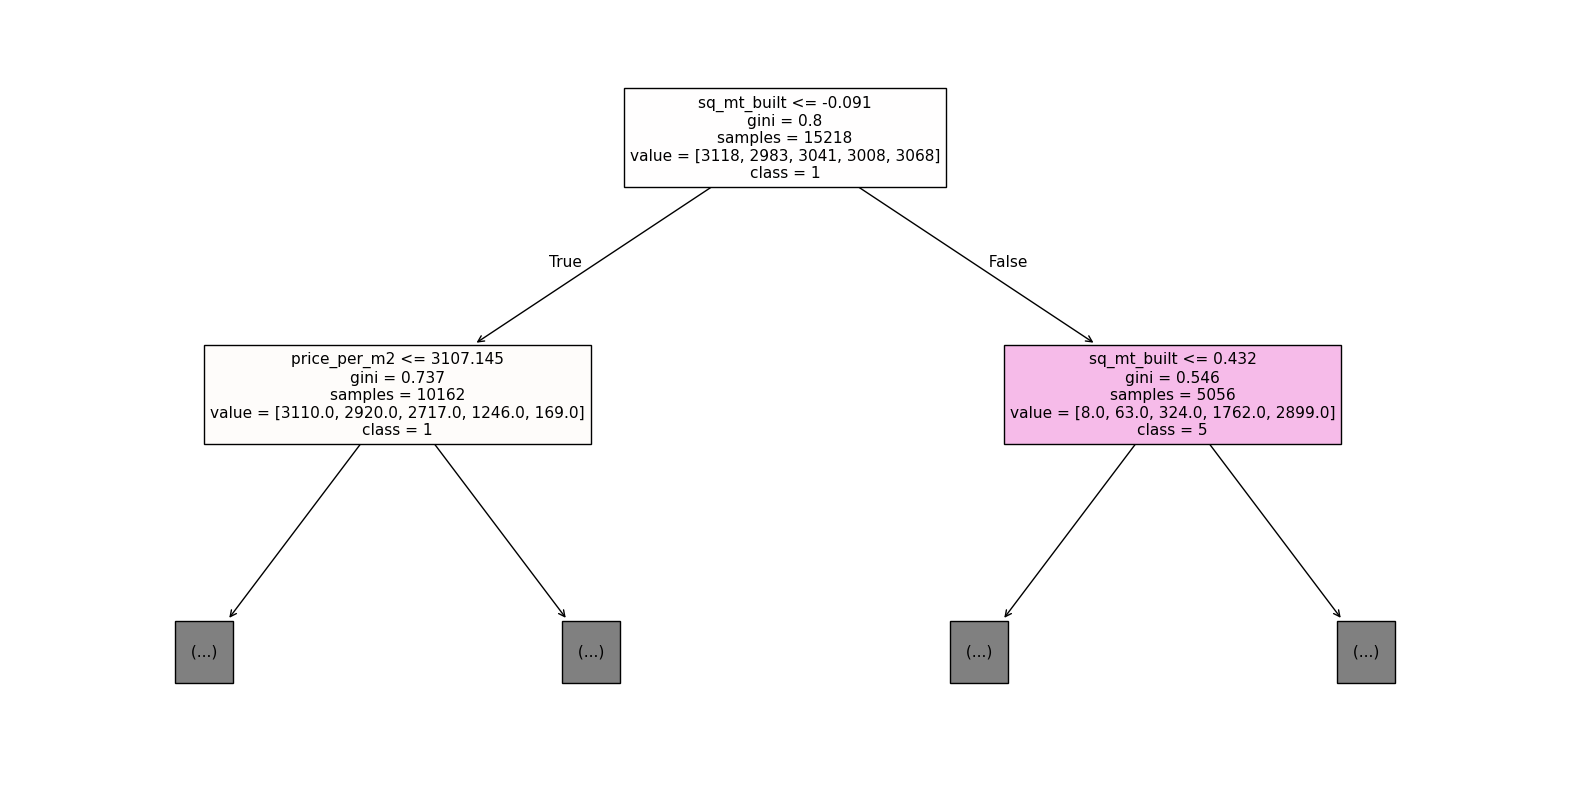

In [10]:
plt.figure(figsize=(20,10))
plot_tree(best_model, 
    filled=True, 
    feature_names=X.columns, 
    class_names=[str(cls) for cls in best_model.classes_],
    max_depth=10
)
plt.show()

plt.figure(figsize=(20,10))
plot_tree(best_model, 
    filled=True, 
    feature_names=X.columns, 
    class_names=[str(cls) for cls in best_model.classes_],
    max_depth=1
)
plt.show()

### Fiabilidad (hojas)


Análisis de hojas ordenadas por pureza:
     node_id  total_samples  majority_class    purity
26        57              4               1  1.000000
599     1198              1               4  1.000000
23        53             16               1  1.000000
22        50              2               2  1.000000
21        48              1               2  1.000000
..       ...            ...             ...       ...
264      534              9               2  0.444444
155      315              9               1  0.444444
237      480             14               1  0.428571
583     1172              5               3  0.400000
353      711              3               2  0.333333

[600 rows x 4 columns]


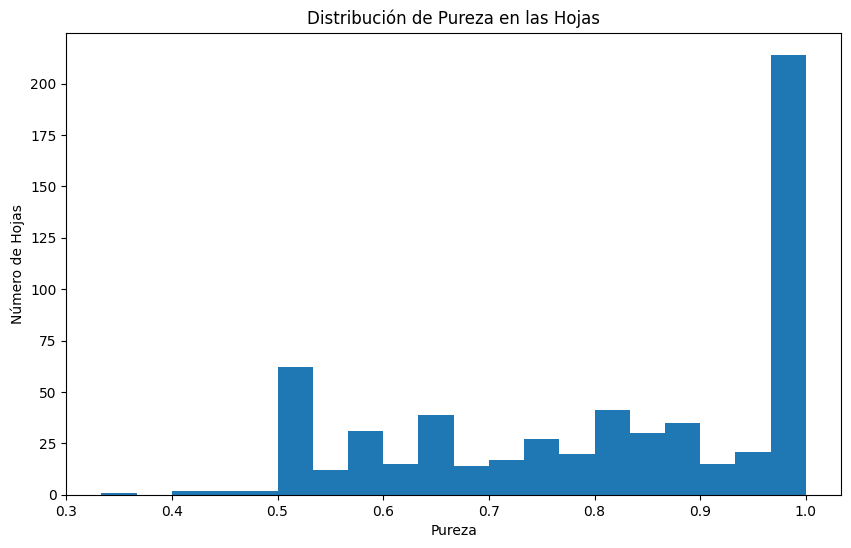


Hojas con baja fiabilidad (pureza < 0.8):
     node_id  total_samples  majority_class    purity
353      711              3               2  0.333333
583     1172              5               3  0.400000
237      480             14               1  0.428571
155      315              9               1  0.444444
264      534              9               2  0.444444
..       ...            ...             ...       ...
457      919             14               4  0.785714
221      447             19               3  0.789474
436      877             34               5  0.794118
349      701             39               3  0.794872
371      745            205               4  0.795122

[244 rows x 4 columns]

Hojas con pocas muestras (< 10):
     node_id  total_samples  majority_class    purity
4         16              1               2  1.000000
599     1198              1               4  1.000000
595     1192              1               4  1.000000
593     1188              1        

In [12]:
def analyze_tree_leaves(tree, X, y):
   
    # Obtener las hojas del árbol
    n_nodes = tree.tree_.node_count
    children_left = tree.tree_.children_left
    children_right = tree.tree_.children_right
    
    # Identificar las hojas (nodos sin hijos)
    is_leaf = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, 0)]  # (node_id, depth)
    while len(stack) > 0:
        node_id, depth = stack.pop()
        
        # Si es una hoja
        if (children_left[node_id] == children_right[node_id]):
            is_leaf[node_id] = True
        else:
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
    
    # Analizar cada hoja
    leaf_info = []
    for node_id in range(n_nodes):
        if is_leaf[node_id]:
            # Obtener las muestras que llegan a esta hoja
            node_samples = tree.apply(X) == node_id
            y_leaf = y[node_samples]
            
            if len(y_leaf) > 0:
                # Calcular métricas
                total_samples = len(y_leaf)
                class_counts = np.bincount(y_leaf)
                majority_class = np.argmax(class_counts)
                purity = class_counts[majority_class] / total_samples
                
                leaf_info.append({
                    'node_id': node_id,
                    'total_samples': total_samples,
                    'majority_class': majority_class,
                    'purity': purity,
                })
    
    return pd.DataFrame(leaf_info)

leaf_analysis = analyze_tree_leaves(best_model, X, y)

print("\nAnálisis de hojas ordenadas por pureza:")
print(leaf_analysis.sort_values('purity', ascending=False))

plt.figure(figsize=(10, 6))
plt.hist(leaf_analysis['purity'], bins=20)
plt.title('Distribución de Pureza en las Hojas')
plt.xlabel('Pureza')
plt.ylabel('Número de Hojas')
plt.show()

print("\nHojas con baja fiabilidad (pureza < 0.8):")
print(leaf_analysis[leaf_analysis['purity'] < 0.8].sort_values('purity'))

print("\nHojas con pocas muestras (< 10):")
print(leaf_analysis[leaf_analysis['total_samples'] < 10].sort_values('total_samples'))